In [1]:
#Problema de Negócio: Analisar 284.807 transações bancárias e "Identificar transações fraudulentas com alta precisão e baixa taxa de falsos positivos".
#Dataset: Credit Card Fraud Detection. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

#Autor KIM JOAQUIM

In [2]:
from platform import python_version
print("Versão Python ultilizada neste Jupyter Notebook é:", python_version())

Versão Python ultilizada neste Jupyter Notebook é: 3.13.5


In [3]:
# 1-Instalações
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
# 2-Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [5]:
# 3-Carregamento dos dados
df= pd.read_csv("C:\Portifolio\projeto-deteccao-fraudes-bancarias\creditcard.csv")

In [6]:
df.shape

(284807, 31)

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# 3-Análise exploratória

In [11]:
#Verifica se a valores ausentes
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# 4-Exploração de Dados (EDA)

<Axes: xlabel='Class', ylabel='count'>

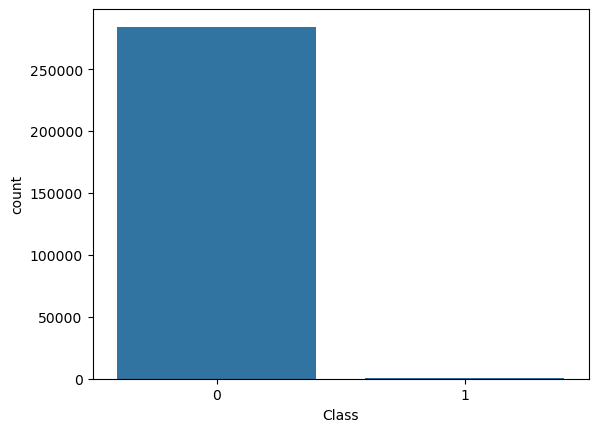

In [13]:
# Desbalanceamento de variável alvo:
df['Class'].value_counts(normalize=True)
sns.countplot(x='Class', data=df)

<Axes: xlabel='Class', ylabel='Amount'>

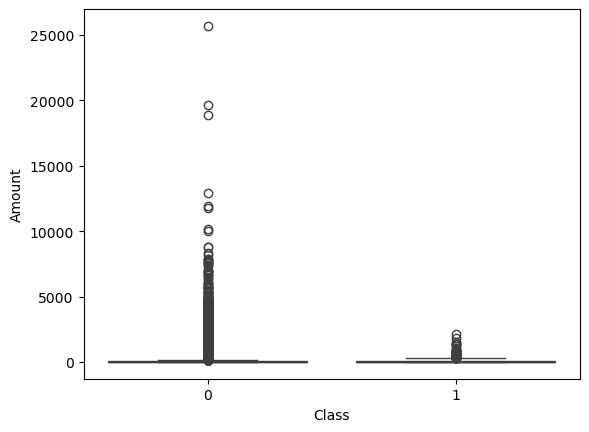

In [14]:
# Comparação de valores por transações:
df.groupby('Class')['Amount'].describe()
sns.boxplot(x='Class', y='Amount', data=df)

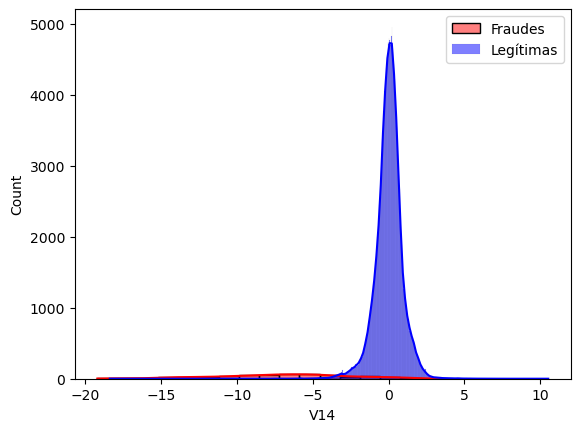

In [15]:
# Análise variáveis importantes (V12,V14,V17...):
sns.histplot(df['V14'][df['Class']==1], kde=True, color='red', label='Fraudes')
sns.histplot(df['V14'][df['Class']==0], kde=True, color='blue', label='Legítimas')
plt.legend()

<Axes: xlabel='Time', ylabel='Count'>

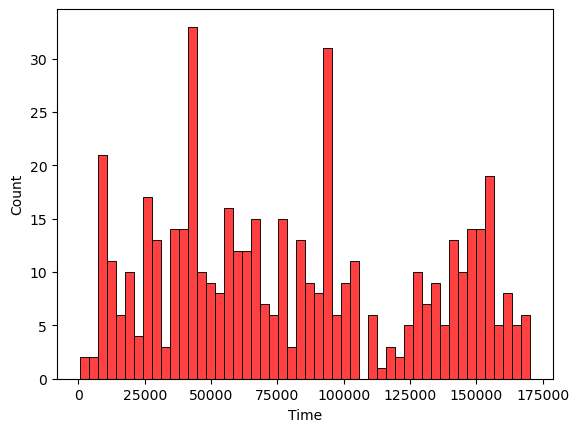

In [16]:
# Explorar padrões temporais (horários mais comuns de fraudes):
sns.histplot(df['Time'][df['Class']==1], bins=50, color='red')

In [17]:
# 5-Pré-Processamento

In [18]:
# Normalização do Amount:
from sklearn.preprocessing import StandardScaler
df['Amount_Scaled'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [19]:
#Separar features e target:
X = df.drop(['Class', 'Time', 'Amount'], axis=1)
y = df['Class']

In [20]:
#Balanceamento das classes (pois fraude = só 0.17% dos casos).
#Usar SMOTE para aumentar casos de fraude:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [21]:
# 6-Modelagem

In [22]:
# Random Forest:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(random_state=42, n_estimators=50)
model.fit(X_res, y_res)

y_pred = model.predict(X)
print(classification_report(y, y_pred))
print("AUC-ROC:", roc_auc_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00       492

    accuracy                           1.00    284807
   macro avg       1.00      1.00      1.00    284807
weighted avg       1.00      1.00      1.00    284807

AUC-ROC: 1.0


In [23]:
# 7-Avaliaçõa do meodelo

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))
print("AUC:", roc_auc_score(y, y_pred))

[[284315      0]
 [     0    492]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00       492

    accuracy                           1.00    284807
   macro avg       1.00      1.00      1.00    284807
weighted avg       1.00      1.00      1.00    284807

AUC: 1.0


In [25]:
# 8-Tratar o desbalanceamento
# (a) Usando SMOTEfrom imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Aplicar SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Antes do SMOTE:", y_train.value_counts())
print("Depois do SMOTE:", y_res.value_counts())


Antes do SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
Depois do SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [26]:
# 9-Métricas certas (Precision, Recall, AUC-ROC)
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9736690944667118


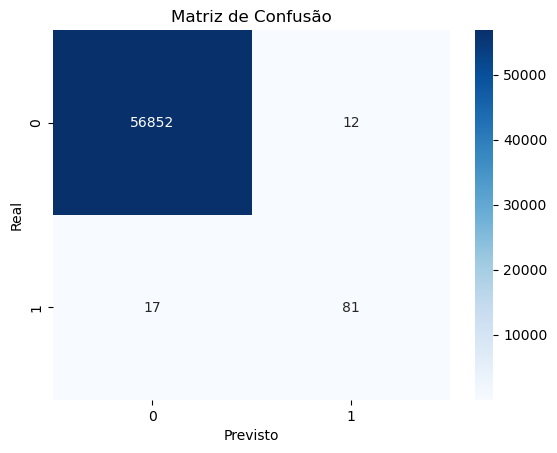

In [27]:
# 10-Visualizações
# Matriz de Confusão
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()